In [ ]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("train_metrics_20250906_0941.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics

,step,train_loss,val_loss,hellaswag_acc,norm,tokens_per_second,lr,shard_index,hellaswag_agg
0,0,11.002272,9.930218,None,6.359549,4901.918389,0.0001,0,NaN
1,5,9.124996,NaN,None,1.654616,147942.899324,0.0001,0,NaN
2,10,8.674741,NaN,None,1.558886,148088.277698,0.0001,0,NaN
3,15,8.305024,NaN,None,1.253612,148587.953378,0.0001,0,NaN
4,20,8.067892,NaN,None,1.195343,150452.327543,0.0001,0,NaN
...,...,...,...,...,...,...,...,...,...
758,3790,4.511414,NaN,None,0.809136,145242.698415,0.0001,1,NaN
759,3795,4.650847,NaN,None,0.769477,145025.375911,0.0001,1,NaN
760,3800,4.389317,4.621023,None,0.755638,145748.358910,0.0001,1,NaN
761,3805,4.557273,NaN,None,0.803210,145162.161091,0.0001,1,NaN


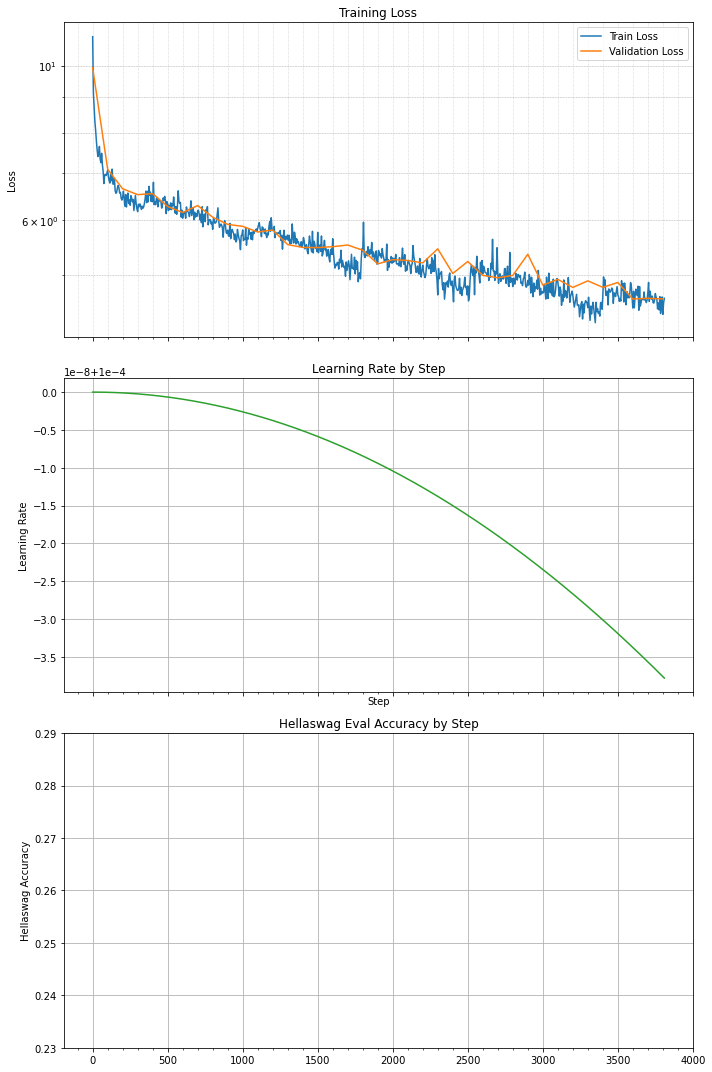

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Add a smoothed loss column using rolling mean
df_metrics['train_loss_smooth'] = df_metrics['train_loss'].rolling(window=500, min_periods=1).mean()

# Plot the smoothed loss line
ax1.plot(df_metrics['step'], df_metrics['train_loss'], color='tab:blue', label='Train Loss')
# Only plot val_loss where it's not NaN
ax1.plot(df_metrics['step'][df_metrics['val_loss'].notna()], 
            df_metrics['val_loss'][df_metrics['val_loss'].notna()], 
            color='tab:orange', label='Validation Loss', zorder=4)
# ax1.plot(df_metrics['step'], df_metrics['train_loss_smooth'], color='tab:red', linestyle='--', label='500 step average', zorder=3)
ax1.legend()
ax1.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
ax1.set_yscale('log')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot Learning Rate
ax2.plot(df_metrics['step'], df_metrics['lr'], color='tab:green')
ax2.set_xlabel('Step')
ax2.set_ylabel('Learning Rate')
ax2.set_title('Learning Rate by Step')
ax2.grid(True)

# Plot Hellaswag eval metric
# df_hellaswag = 

ax3.plot(df_metrics['step'][df_metrics['hellaswag_acc'].notna()], df_metrics['hellaswag_acc'][df_metrics['hellaswag_acc'].notna()], color='tab:blue',)
ax3.set_ylabel('Hellaswag Accuracy')
ax3.set_title('Hellaswag Eval Accuracy by Step')
ax3.grid(True)
ax3.set_ylim(bottom=0.23, top=0.29)

plt.tight_layout()
plt.show()


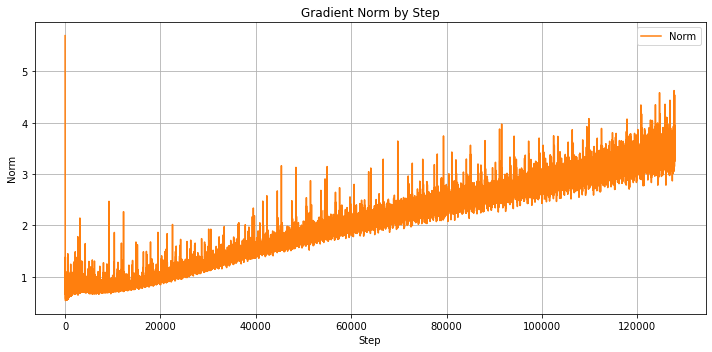

In [22]:
# Plot Norm
fig_norm, ax_norm = plt.subplots(figsize=(10, 5))
ax_norm.plot(df_metrics['step'], df_metrics['norm'], color='tab:orange', label='Norm')
ax_norm.set_xlabel('Step')
ax_norm.set_ylabel('Norm')
ax_norm.set_title('Gradient Norm by Step')
ax_norm.grid(True)
ax_norm.legend()
plt.tight_layout()
plt.show()
